<a href="https://colab.research.google.com/github/Bambani2003/Data_Science_Projects/blob/main/Treatment_Cost_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA and prediciton of the cost to treat different patients based on various factors.

In [1]:
# Modules required for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/insurance.csv')

In [2]:
# Basic format of the dataset

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Missing value treatment

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
# Encoding for categorical features

from sklearn.preprocessing import LabelEncoder

#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates())          # 0: Female, 1: Male
data.sex = le.transform(data.sex)

# smoker or not
le.fit(data.smoker.drop_duplicates())       # 0: No, 1: Yes
data.smoker = le.transform(data.smoker)

#region
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)     # 0: NE, 1: NW, 2: SE, 3: SW
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<Axes: >

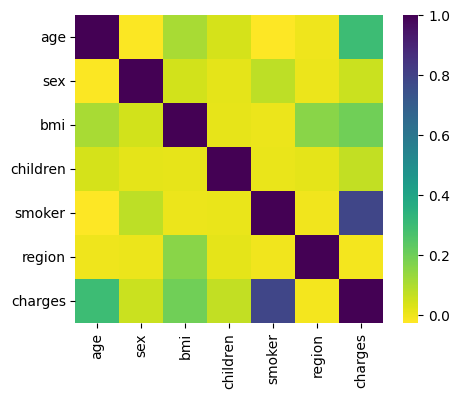

In [5]:
# Seaborn heat map

f, ax = plt.subplots(figsize=(5, 4))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap='viridis_r', square=True, ax=ax)

**INFERENCES:**
1.   The biggest factor affecting the cost or charge is smoking.
2.   BMI isn't as big a factor as thought.

In [6]:
# Checking the above inference

data.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

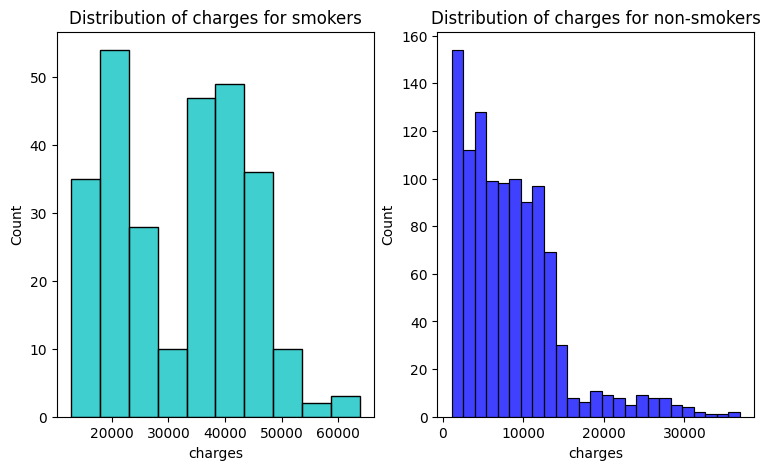

In [7]:
# Looking at data for smokers

f= plt.figure(figsize=(9,5))
ax=f.add_subplot(121)
sns.histplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')
ax=f.add_subplot(122)
sns.histplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

**INFERENCE:**

*   An average smoker pays much more charge than an average non smoker.

In [8]:
# Checking the above inference

mean_cost_for_smokers = data.groupby('smoker')['charges'].mean()
mean_cost_for_smokers

smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

Text(0.5, 1.0, 'Scatter plot of charges and bmi')

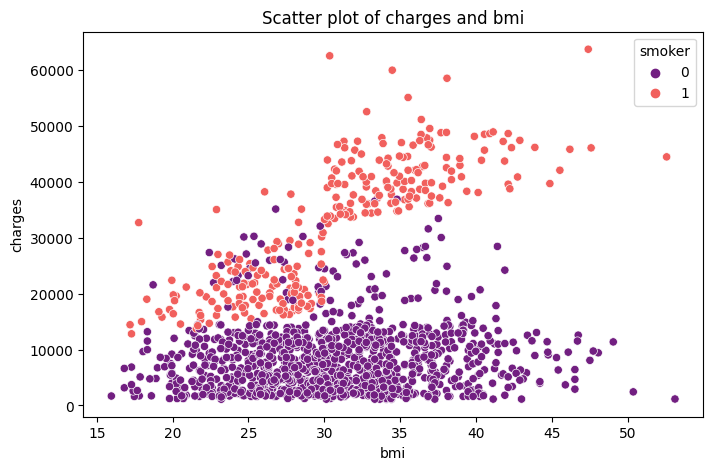

In [9]:
# Looking at data for BMI

plt.figure(figsize=(8,5))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

**Inference:**
*   BMI doesn't affect the cost of treatment for non smokers.
*   Cost of treatment for smokers suddenly increases when their BMI>30.

Text(0.5, 1.0, 'Scatter plot of charges and age')

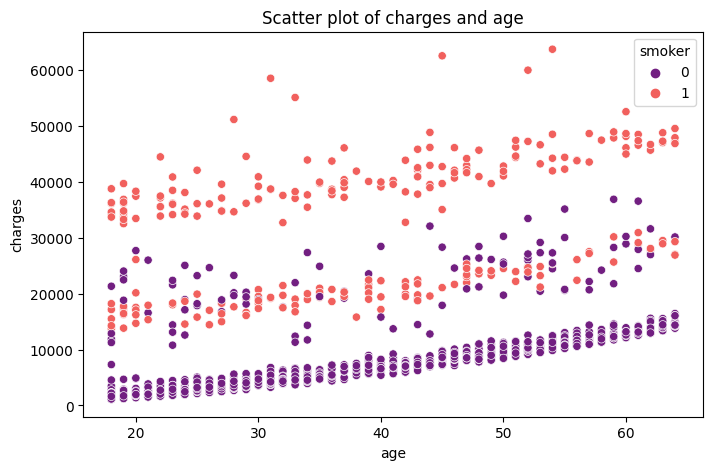

In [10]:
# Looking at data for Age

plt.figure(figsize=(8,5))
ax = sns.scatterplot(x='age',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and age')

**We can't draw any such inference about age as data has lots of outliers.**

In [11]:
# Modules required for Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, normalize
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Basic linear regression

x = data.drop(['charges'], axis = 1)
y = data['charges']

x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=0, train_size=0.75)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(f"Accuracy = {lr.score(x_test,y_test)}")

Accuracy = 0.7962732059725786


In [13]:
# Changing features for better accuracy

X = data.drop(['charges','region'], axis = 1)
Y = data.charges

quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0, train_size=0.75)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(f"Accuracy = {plr.score(X_train,Y_train)}")
print(f"Accuracy = {plr.score(X_test,Y_test)}")

Accuracy = 0.8279710690170309
Accuracy = 0.8849197344147227
